In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [63]:
matches = pd.read_csv("matches.csv", index_col=0)

In [64]:
# Print the first few rows of the matches DataFrame
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


In [65]:
# Data overview
print(matches.shape)
print(matches.dtypes)
print(matches.isnull().sum())

(3010, 27)
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       700
captain            0
formation   

In [66]:
# liverpool matches
matches[matches["team"] == "Liverpool"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,18.4,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,18.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,8.0,17.9,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,16.3,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,16.0,2.0,0.0,0.0,2021,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2024-04-14,14:00,Premier League,Matchweek 33,Sun,Home,L,0.0,1.0,Crystal Palace,...,Match Report,NaN,21.0,5.0,12.5,1.0,0.0,0.0,2024,Liverpool
52,2024-04-21,16:30,Premier League,Matchweek 34,Sun,Away,W,3.0,1.0,Fulham,...,Match Report,NaN,14.0,7.0,18.8,2.0,0.0,0.0,2024,Liverpool
53,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,0.0,2.0,Everton,...,Match Report,NaN,23.0,7.0,16.8,0.0,0.0,0.0,2024,Liverpool
54,2024-04-27,12:30,Premier League,Matchweek 35,Sat,Away,D,2.0,2.0,West Ham,...,Match Report,NaN,28.0,8.0,16.6,1.0,0.0,0.0,2024,Liverpool


In [67]:
# Drop irrelevant columns
matches.drop(["comp", "notes"], axis=1, inplace=True)

In [68]:
# Convert date column to datetime
matches["date"] = pd.to_datetime(matches["date"])

In [69]:
# Create target variable
matches["target"] = (matches["result"] == "W").astype("int")

In [70]:
matches.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,target
1,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,Match Report,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City,1
2,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,Match Report,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City,1
3,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,Match Report,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City,0
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,Match Report,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City,1
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,Match Report,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City,1


In [71]:
# Feature engineering
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype(int)
matches["day_code"] = matches["date"].dt.dayofweek

In [72]:
matches.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,1.0,1.0,1.0,2023,Manchester City,1,0,24,16,6
2,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,0.0,0.0,0.0,2023,Manchester City,1,1,2,15,5
3,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,1.0,0.0,0.0,2023,Manchester City,0,0,16,16,6
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,0.0,0.0,0.0,2023,Manchester City,1,1,7,15,5
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,0.0,0.0,0.0,2023,Manchester City,1,1,18,19,2


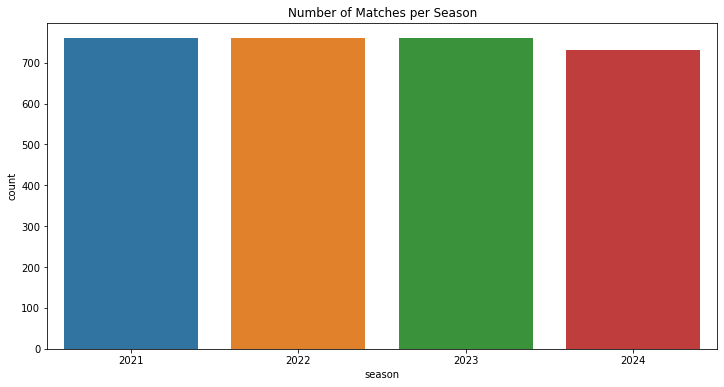

In [73]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=matches)
plt.title('Number of Matches per Season')
plt.show()

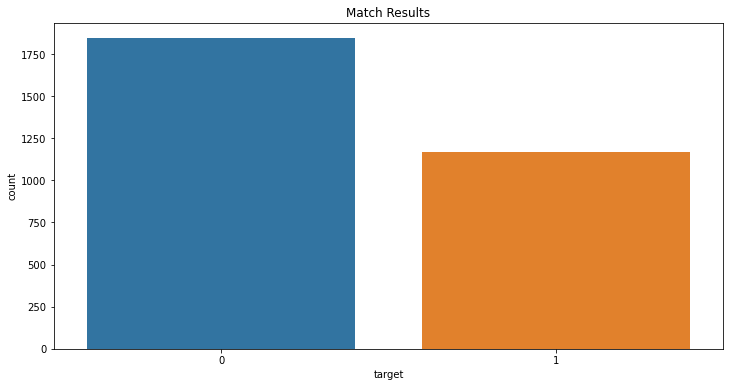

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=matches)
plt.title('Match Results')
plt.show()

In [75]:
# Split the data into training and testing sets
train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [76]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(train[predictors], train["target"])

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
preds = best_rf.predict(test[predictors])

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [77]:
# Calculate accuracy and other metrics
acc_rf = accuracy_score(test["target"], preds)
precision_rf = precision_score(test["target"], preds)
f1_rf = f1_score(test["target"], preds)
roc_auc_rf = roc_auc_score(test["target"], preds)

In [78]:
print("Accuracy: ", acc_rf)
print("Precision: ", precision_rf)
print("F1 Score: ", f1_rf)
print("ROC-AUC: ", roc_auc_rf)

Accuracy:  0.6547619047619048
Precision:  0.547945205479452
F1 Score:  0.40816326530612246
ROC-AUC:  0.5851368372838658


In [79]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [80]:
confusion_matrix = pd.crosstab(index=combined["actual"], columns=combined["predicted"])
confusion_matrix

predicted,0,1
actual,,
0,180,33
1,83,40


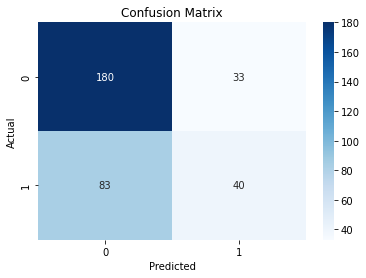

In [81]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [82]:
# Print classification report
print(classification_report(test["target"], preds))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       213
           1       0.55      0.33      0.41       123

    accuracy                           0.65       336
   macro avg       0.62      0.59      0.58       336
weighted avg       0.63      0.65      0.63       336



In [88]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize the Naive Bayes classifier
gnb = GaussianNB()

# Fit the Naive Bayes classifier to the training data
gnb.fit(train[predictors], train["target"])

# Make predictions on the test set using the Naive Bayes classifier
preds_gnb = gnb.predict(test[predictors])

# Calculate accuracy and other metrics for Naive Bayes
acc_gnb = accuracy_score(test["target"], preds_gnb)
precision_gnb = precision_score(test["target"], preds_gnb)
f1_gnb = f1_score(test["target"], preds_gnb)
roc_auc_gnb = roc_auc_score(test["target"], preds_gnb)

# Initialize the SVM classifier
svc = SVC(random_state=1)

# Fit the SVM classifier to the training data
svc.fit(train[predictors], train["target"])

# Make predictions on the test set using the SVM classifier
preds_svc = svc.predict(test[predictors])

# Calculate accuracy and other metrics for SVM
acc_svc = accuracy_score(test["target"], preds_svc)
precision_svc = precision_score(test["target"], preds_svc)
f1_svc = f1_score(test["target"], preds_svc)
roc_auc_svc = roc_auc_score(test["target"], preds_svc)

# Create a DataFrame to hold the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1 Score', 'ROC-AUC'],
    'Naive Bayes': [acc_gnb, precision_gnb, f1_gnb, roc_auc_gnb],
    'SVM': [acc_svc, precision_svc, f1_svc, roc_auc_svc],
    'Random Forest': [acc_rf, precision_rf, f1_rf, roc_auc_rf]
})

# Highlight the maximum in each row
def highlight_max(data, color='green'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data[1:].max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.iloc[:, 1:].max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

# Display the metrics DataFrame with highlighting
metrics.style.apply(highlight_max, color='green', axis=1)


c:\Users\ulas_\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Naive Bayes,SVM,Random Forest
0,Accuracy,0.612957,0.609635,0.654762
1,Precision,0.625000,0.000000,0.547945
2,F1 Score,0.041152,0.000000,0.408163
3,ROC-AUC,0.506551,0.500000,0.585137


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score, roc_auc_score

# Load the data
matches = pd.read_csv("matches.csv", index_col=0)

# Data preprocessing
matches.drop(["comp", "notes"], axis=1, inplace=True)
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype(int)
matches["day_code"] = matches["date"].dt.dayofweek

# Split the data into training and testing sets
train, test = train_test_split(matches, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[["venue_code", "opp_code", "hour", "day_code"]])
test_scaled = scaler.transform(test[["venue_code", "opp_code", "hour", "day_code"]])

# Convert data to PyTorch tensors
train_inputs = torch.tensor(train_scaled, dtype=torch.float32)
train_labels = torch.tensor(train["target"].values, dtype=torch.float32)
test_inputs = torch.tensor(test_scaled, dtype=torch.float32)
test_labels = torch.tensor(test["target"].values, dtype=torch.float32)

# Define a simple feedforward neural network model
class FFNN(nn.Module):
    def __init__(self, input_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
input_size = train_scaled.shape[1]
model = FFNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
batch_size = 32
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i in range(0, len(train_inputs), batch_size):
        inputs = train_inputs[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_inputs)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

# Evaluate the PyTorch model on the test set
model.eval()
with torch.no_grad():
    outputs = model(test_inputs)
    preds = torch.round(outputs)

    # Calculate accuracy, precision, F1 score, and ROC-AUC
    correct = (preds == test_labels.unsqueeze(1)).sum().item()
    accuracy_pytorch = correct / len(test_inputs)
    precision_pytorch = precision_score(test_labels.numpy(), preds.numpy())
    f1_pytorch = f1_score(test_labels.numpy(), preds.numpy())
    roc_auc_pytorch = roc_auc_score(test_labels.numpy(), preds.numpy())

# Append PyTorch model metrics to the DataFrame
metrics['FeedForwardNN'] = [accuracy_pytorch, precision_pytorch, f1_pytorch, roc_auc_pytorch]

# Display the metrics DataFrame with highlighting
metrics.style.apply(highlight_max, color='green', axis=1)


Epoch [1/50], Loss: 0.6683
Epoch [2/50], Loss: 0.6621
Epoch [3/50], Loss: 0.6611
Epoch [4/50], Loss: 0.6607
Epoch [5/50], Loss: 0.6601
Epoch [6/50], Loss: 0.6598
Epoch [7/50], Loss: 0.6595
Epoch [8/50], Loss: 0.6591
Epoch [9/50], Loss: 0.6586
Epoch [10/50], Loss: 0.6582
Epoch [11/50], Loss: 0.6578
Epoch [12/50], Loss: 0.6574
Epoch [13/50], Loss: 0.6571
Epoch [14/50], Loss: 0.6566
Epoch [15/50], Loss: 0.6561
Epoch [16/50], Loss: 0.6556
Epoch [17/50], Loss: 0.6551
Epoch [18/50], Loss: 0.6546
Epoch [19/50], Loss: 0.6542
Epoch [20/50], Loss: 0.6537
Epoch [21/50], Loss: 0.6531
Epoch [22/50], Loss: 0.6526
Epoch [23/50], Loss: 0.6522
Epoch [24/50], Loss: 0.6516
Epoch [25/50], Loss: 0.6511
Epoch [26/50], Loss: 0.6506
Epoch [27/50], Loss: 0.6502
Epoch [28/50], Loss: 0.6497
Epoch [29/50], Loss: 0.6492
Epoch [30/50], Loss: 0.6488
Epoch [31/50], Loss: 0.6484
Epoch [32/50], Loss: 0.6480
Epoch [33/50], Loss: 0.6475
Epoch [34/50], Loss: 0.6471
Epoch [35/50], Loss: 0.6467
Epoch [36/50], Loss: 0.6463
E

,Metric,Naive Bayes,SVM,Random Forest,FeedForwardNN
0,Accuracy,0.639881,0.633929,0.654762,0.606312
1,Precision,0.600000,0.000000,0.547945,0.480769
2,F1 Score,0.090226,0.000000,0.408163,0.174216
3,ROC-AUC,0.515001,0.500000,0.585137,0.516407
